In [1]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
set.seed(123)

y<-ts(numeric(300))
e<-rnorm(300)

for(t in 2:300){
    y[t] = 0.9*y[t-1] + e[t]
}

train<-window(y, start=1, end=250)
test<-window(y, start=251, end=300)

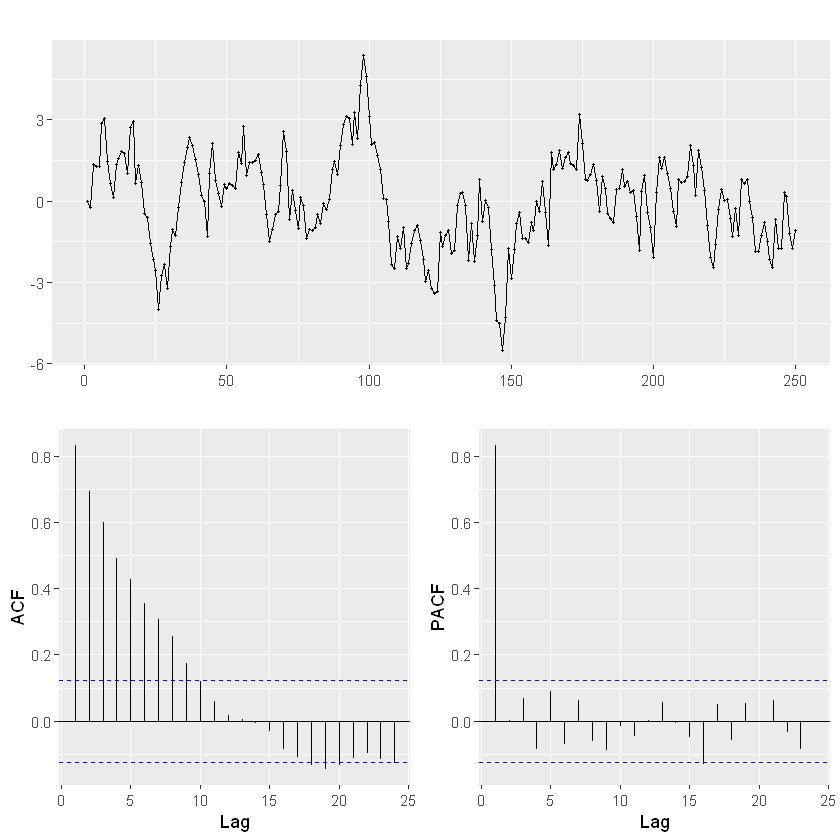

In [3]:
#1. 모형식별 - ACF, PACF 함수로 식별
ggtsdisplay(train)

In [4]:
#1. 모형식별 - KPSS 검정으로 식별
library(urca)
summary(ur.kpss(train))
# 검정통계량이 모든 유의수준의 임계치보다 낮기 때문에 귀무가설(정상시계열이다)를 채택!


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.295 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [7]:
#2. 모수추정 - AR(자기회귀모형) 이용
ar_1<-Arima(train, order=c(1,0,0))
ar_1
# 모수(파라미터)값인 계수(파이)값의 최적값은 0.8310

Series: train 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1     mean
      0.8310  -0.0439
s.e.  0.0346   0.3426

sigma^2 estimated as 0.8775:  log likelihood=-337.99
AIC=681.98   AICc=682.07   BIC=692.54

In [10]:
#3. 적합성 진단 - 잔차를 이용해 검정 -> Ljung-Box 검정(시차는 10으로 가정)
Box.test(ar_1$residuals, lag=10)
# p-value값이 유의수준인 0.05보다 크므로 귀무가설(잔차들간의 자기상관성 없음!) 채택
# 그러므로 AR(1)모델 적합!


	Box-Pierce test

data:  ar_1$residuals
X-squared = 8.8343, df = 10, p-value = 0.5479


Warning message in modeldf.default(object):
"Could not find appropriate degrees of freedom for this model."


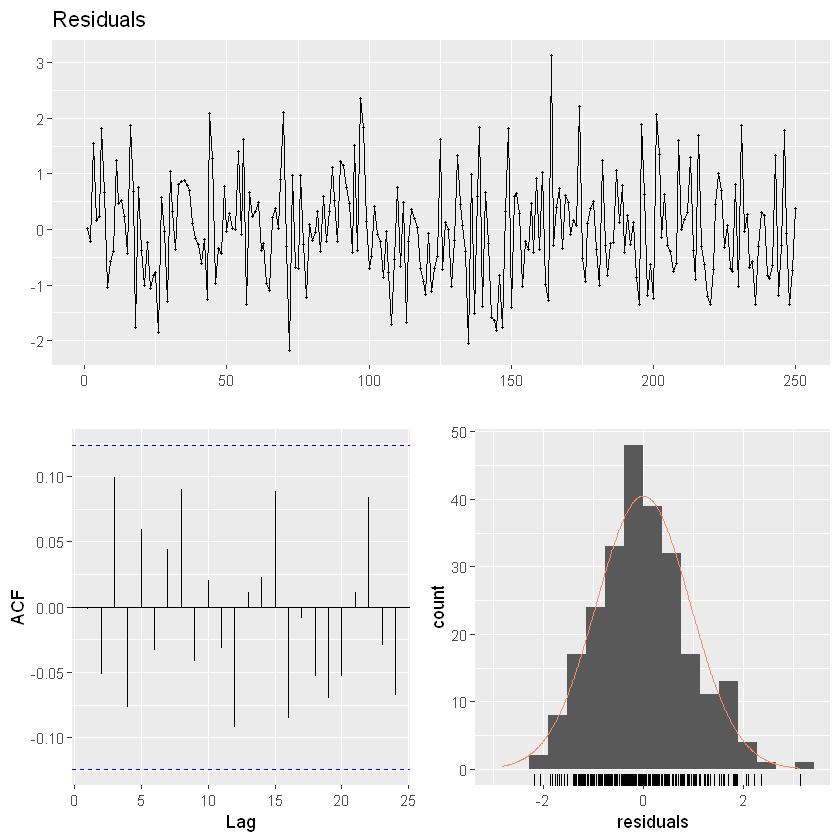

In [11]:
#3. 적합성 진단 - 잔차를 이용해 검정 -> checkresiduals()함수 사용해 검정
checkresiduals(ar_1$residuals)
# ACF함수가 신뢰수준(파란색 선)을 넘지 않으면 잔차들이 정규분포 형태를 나타내므로 해당 모델인 AR(1)모델 적합!

In [15]:
#4-1. AR(1)모형의 예측값과 실제값 비교
ar_1_f<-forecast(ar_1, h=50)
accuracy(ar_1_f, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0002193751,0.9330154,0.7415672,Inf,Inf,0.9533853,-0.001566673,NA
Test set,1.6279110251,2.3970513,1.9074838,195.2267,195.2267,2.4523294,0.807250912,1.3119


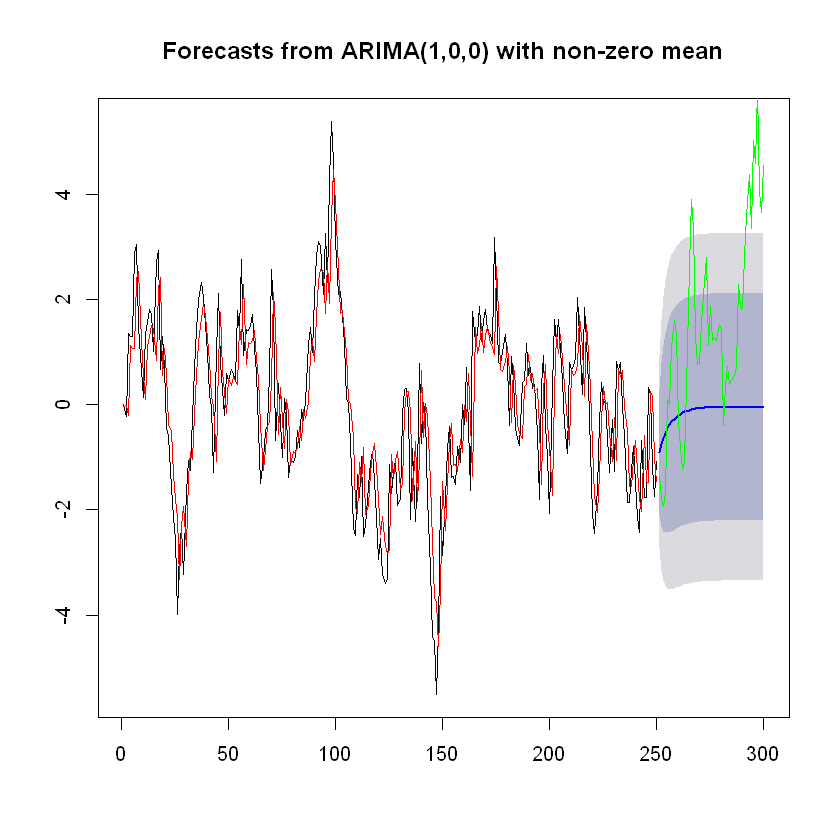

In [36]:
#4-1. 그래프로 표현
library(ggplot2)
plot(ar_1_f)
lines(ar_1_f$fitted, col='red')
lines(test, col='green')

In [18]:
#4-2. meanf방법을 사용했을 때와 비교
mean_f<-meanf(train, h=50)
accuracy(mean_f, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,4.622518e-17,1.689364,1.353918,Inf,Inf,1.740645,0.8330070,NA
Test set,1.506568e+00,2.397479,1.919964,107.0437,107.0437,2.468375,0.8154202,1.032531


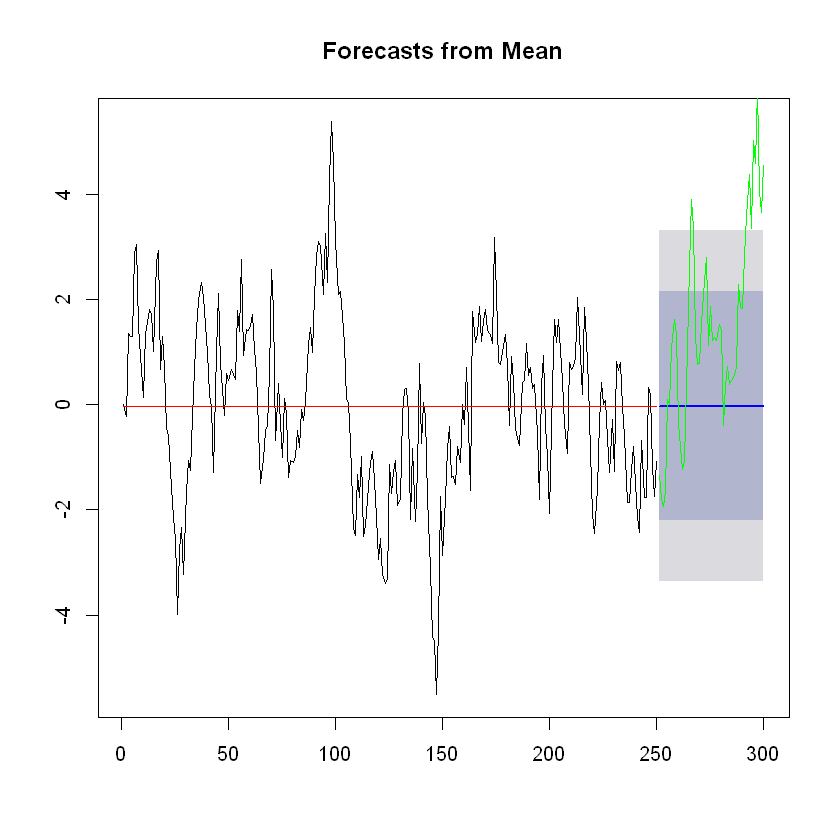

In [35]:
plot(mean_f)
lines(mean_f$fitted, col='red')
lines(test, col='green')

In [19]:
#4-3. naive방법을 사용했을 때와 비교
naive<-naive(train, h=50)
accuracy(naive, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.004333802,0.9759803,0.7778253,-108.7709,277.9103,1.000000,-0.08910555,NA
Test set,2.561347298,3.1683839,2.6632832,412.3181,429.4198,3.424012,0.81542022,2.009715


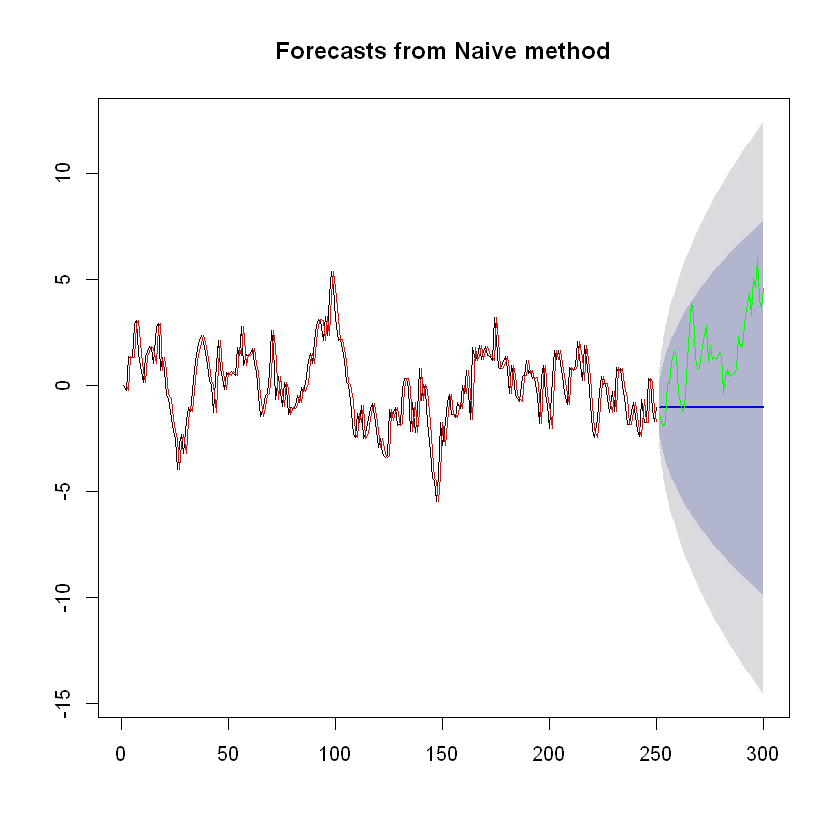

In [34]:
plot(naive)
lines(naive$fitted, col='red')
lines(test, col='green')